In [12]:
import pandas as pd
import requests

def downloadFile(url):
  response = requests.get(url)
  fname = response.headers['Content-Disposition'].split('=')[1]
  fname = 'data/' + fname
  if response.ok:
    with open (fname, 'wb') as file_object:
      file_object.write(response.content)
    return fname
    
#What is the change in pct of divorced danes from 2008 to 2020?




In [14]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2020K3&CIVILSTAND=F'
data = pd.read_csv(downloadFile(url), sep = ';')
data['INDHOLD'].astype(float).pct_change()


0         NaN
1    0.284125
Name: INDHOLD, dtype: float64

In [15]:
#Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&K%C3%98N=TOT&ALDER=IALT&CIVILSTAND=U%2CTOT&Tid=2020K3'
df = pd.read_csv(downloadFile(url), sep = ';')
top5_cities = ['København','Aarhus','Odense','Aalborg', 'Esbjerg']
percentages = {}

for city in top5_cities:
    rows = df.loc[df['OMRÅDE'] == city]
    totalCitizens = df.loc[(df['OMRÅDE'] == city) & (df['CIVILSTAND'] == 'I alt')].iloc[0][5]
    unMarried = df.loc[(df['OMRÅDE'] == city) & (df['CIVILSTAND'] == 'Ugift')].iloc[0][5]
    percentage = (unMarried / totalCitizens) * 100
    percentages[city] = percentage;

print(percentages);
highestPercentage = max(percentages.values())
city = max(percentages, key=percentages.get)

print('{} is the city with highest percentage of never married citizens, with {:.2f} %'.format(city,highestPercentage))


{'København': 65.43366480526353, 'Aarhus': 59.65950554183491, 'Odense': 55.037661563712035, 'Aalborg': 54.61815973053066, 'Esbjerg': 47.84262862083874}
København is the city with highest percentage of never married citizens, with 65.43 %


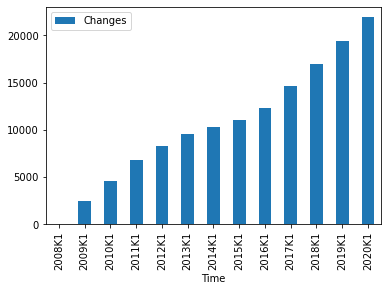

In [20]:
#Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&CIVILSTAND=G&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1'

df = pd.read_csv(downloadFile(url), sep=';')
start = '2008K1';
rows = df.loc[df['TID'] == start];
marriedOrSep2008Q1 = df.loc[(df['TID'] == start)].iloc[0][3]
values = tuple(list(df['INDHOLD']))
time = tuple(list(df['TID']))
valuesSubtracted = []

for value in values:
  value -= marriedOrSep2008Q1
  valuesSubtracted.append(value);


df_plot = pd.DataFrame({'Time':time,'Changes':valuesSubtracted})
ax = df_plot.plot.bar(x='Time', y='Changes');


